# Data Processing and Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data =pd.read_csv(r"C:\Users\muham\OneDrive\Dokumen\DATA ANALYST\database\cohort\Online_Retail.csv")
data

C:\Users\muham\AppData\Local\Temp\ipykernel_23180\3883110609.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv(r"C:\Users\muham\OneDrive\Dokumen\DATA ANALYST\database\cohort\Online_Retail.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
397925,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
397926,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
397927,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
397928,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397930 entries, 0 to 397929
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397930 non-null  object 
 1   StockCode    397930 non-null  object 
 2   Description  397930 non-null  object 
 3   Quantity     397930 non-null  int64  
 4   InvoiceDate  397930 non-null  object 
 5   UnitPrice    397930 non-null  float64
 6   CustomerID   397930 non-null  int64  
 7   Country      397930 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 24.3+ MB


In [5]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397930 entries, 0 to 397929
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397930 non-null  object        
 1   StockCode    397930 non-null  object        
 2   Description  397930 non-null  object        
 3   Quantity     397930 non-null  int64         
 4   InvoiceDate  397930 non-null  datetime64[ns]
 5   UnitPrice    397930 non-null  float64       
 6   CustomerID   397930 non-null  int64         
 7   Country      397930 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.3+ MB


In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# create an invoice month

In [8]:
import datetime as dt
def get_month(x):
    return dt.datetime(x.year, x.month,1)
data['InvoiceMonth']=data['InvoiceDate'].apply(get_month)
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
397925,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-01
397926,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-01
397927,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01
397928,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01
397929,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-01


# Create a Column Index
create a column index with the minimum invoice date aka first time customer was acquired

In [9]:
data['Cohort Month'] =  data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,2010-12-01,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,2010-12-01,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010-12-01,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010-12-01,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,2010-12-01,2010-12-01


# Create a date element function
create a date element function to get a series for subtraction

In [10]:
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

# Get date elements
get date elements for our cohort and invoice columns

In [11]:
_,Invoice_month,Invoice_year =  get_date_elements(data,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(data,'Cohort Month')

In [12]:
Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Cohort Month, dtype: int32

In [13]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01


# Create a cohort index 

In [14]:
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
data['CohortIndex'] = year_diff*12+month_diff+1
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
397925,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-01,2011-08-01,5
397926,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-01,2011-08-01,5
397927,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2011-08-01,5
397928,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2011-08-01,5
397929,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-01,2011-08-01,5


# Count the customerID 
by grouping by Cohort Month  and Cohort Index 

In [15]:
cohort_data = data.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,324
89,2011-11-01,2,36


# Create a pivot table 

In [16]:
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Change index

<Axes: xlabel='CohortIndex', ylabel='Cohort Month'>

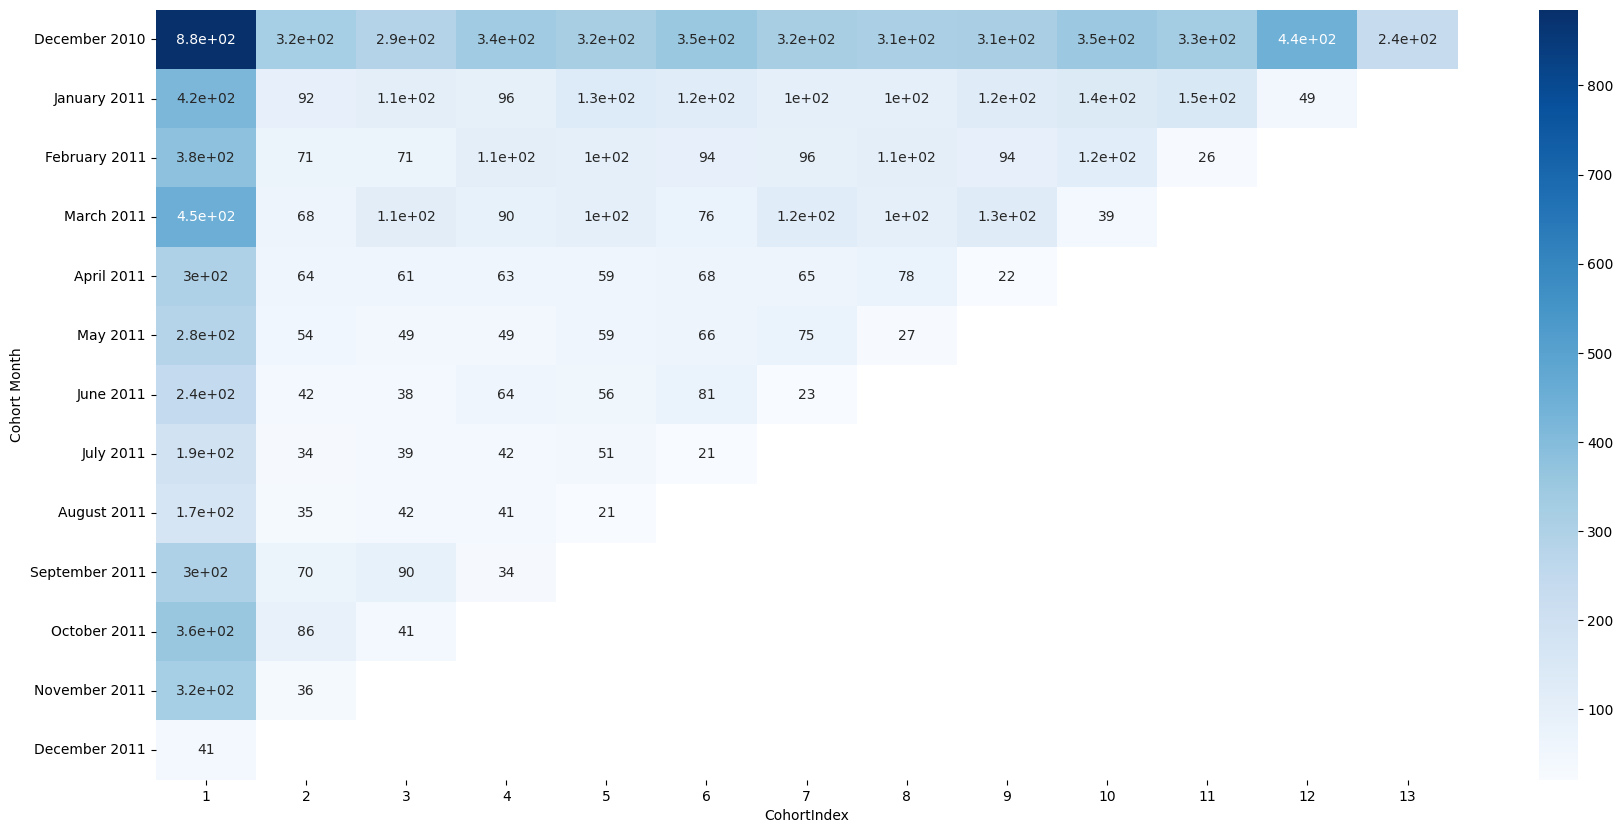

In [17]:
cohort_table.index= cohort_table.index.strftime ('%B %Y')
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap= 'Blues')

# Cohort table for percentage

In [18]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
December 2010,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
January 2011,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
February 2011,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
March 2011,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
April 2011,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
May 2011,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create a percentages visual

<Axes: xlabel='CohortIndex', ylabel='Cohort Month'>

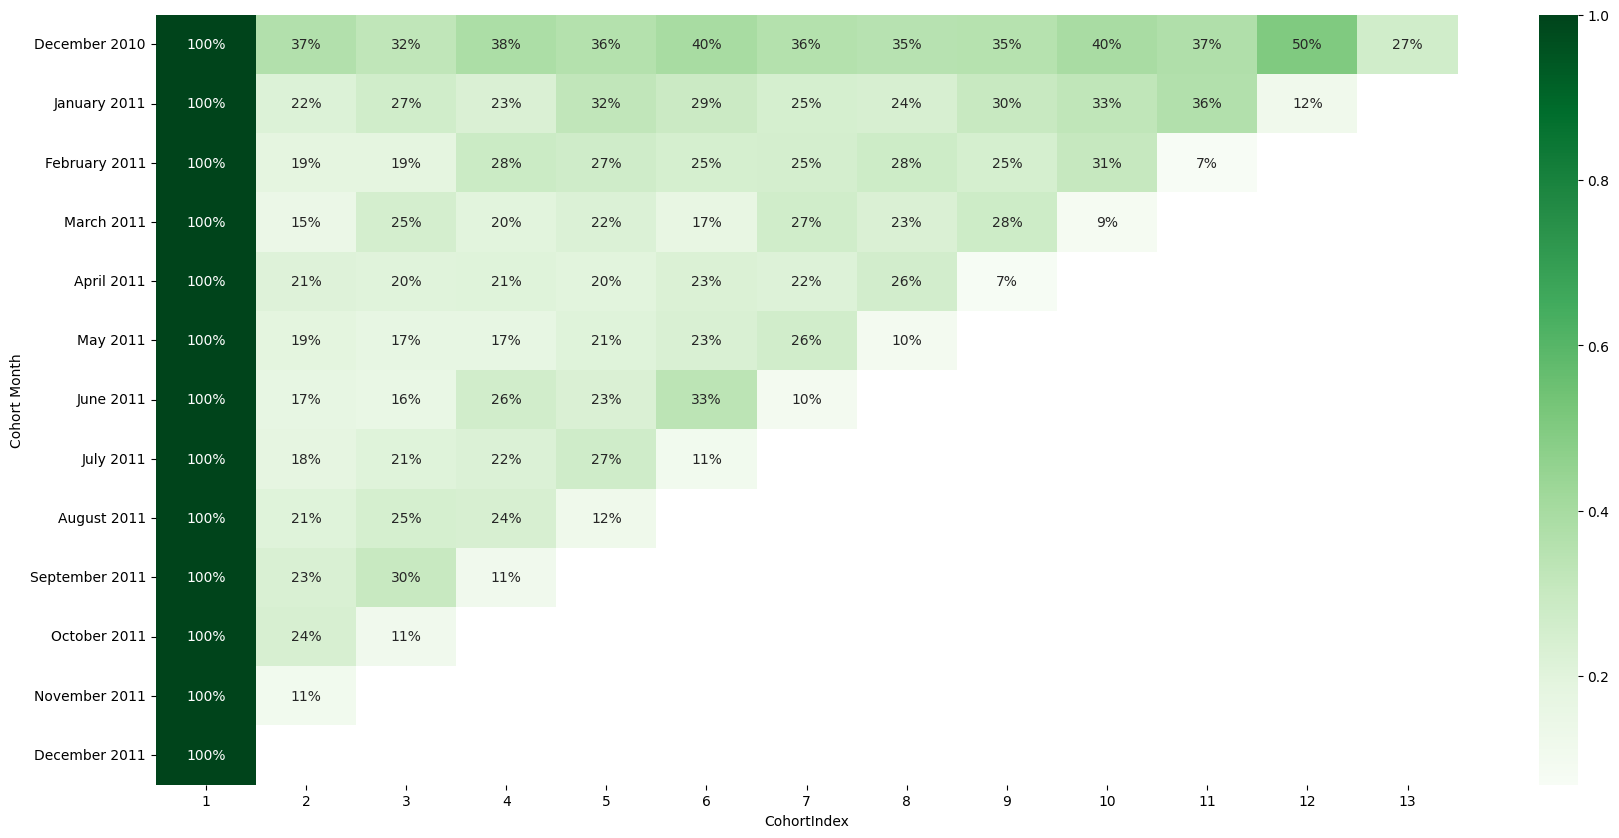

In [19]:
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,cmap='Greens',fmt='.0%')

The purpose of cohort analysis is to observe behavioral trends or patterns of consumers over time. 
Each row represents a user or consumer group, and each column represents the month after the group was formed. 
The first month is the acquisition month. The values in the cells represent calculated analysis metrics. 
In this case, the data pertains to the number of consumers who made online retail purchases. The second month and subsequent months indicate the return of consumers for transactions. From the table, we can see a significant drop in the number of consumers in the second month, but from the third month onwards, the trend stabilizes. Interestingly, there is a consistent pattern of high transaction activity in November, as indicated by the diagonal line.